### links
https://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

In [32]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [2]:
from jupyterworkflow.data import get_fremont_data

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

## Get data

In [3]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2019-11-01 00:00:00,7.0,5.0,12.0
2019-11-01 01:00:00,0.0,7.0,7.0
2019-11-01 02:00:00,0.0,1.0,1.0
2019-11-01 03:00:00,6.0,0.0,6.0
2019-11-01 04:00:00,5.0,1.0,6.0


## Bash code

In [4]:
%%bash
head -3 "Fremont.csv"

Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
11/01/2019 12:00:00 AM,12,7,5
11/01/2019 01:00:00 AM,7,0,7


## Plotting 

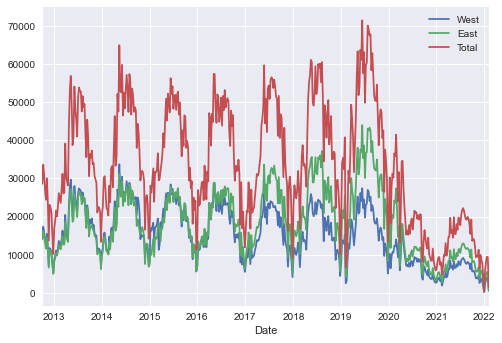

In [5]:
data.resample("W").sum().plot();

(0.0, 2526780.65)

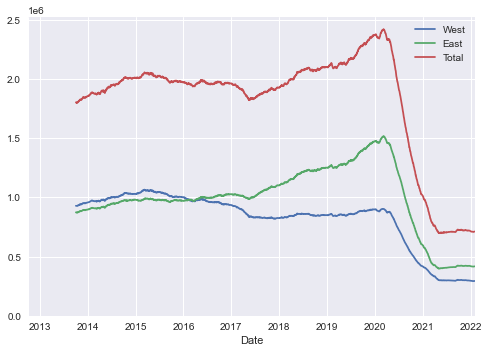

In [6]:
ax = data.resample("D").sum().rolling(365).sum().plot();
ax.set_ylim(0,None)

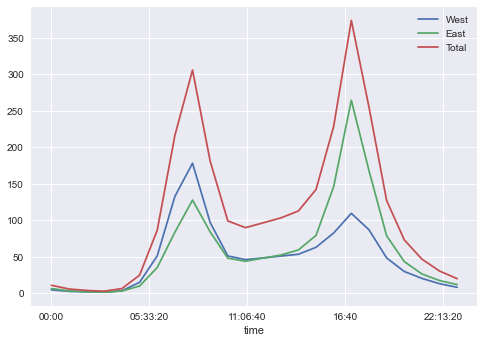

In [7]:
data.groupby(data.index.time).mean().plot();

## Creating pivot table

In [8]:
pivoted = data.pivot_table("Total", index = data.index.time, columns=data.index.date)

In [9]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<AxesSubplot:xlabel='time'>

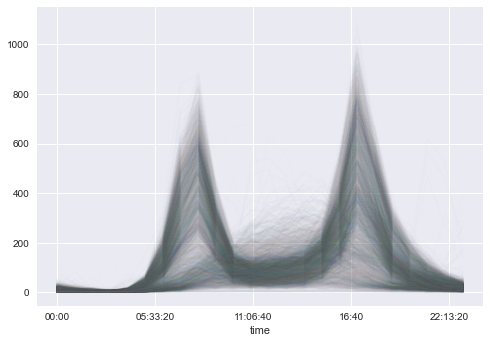

In [10]:
pivoted.plot(legend=False,alpha=0.01)

In [11]:
X = pivoted.fillna(0).T.values

## PCA

In [15]:
X2 = PCA(2,svd_solver='full').fit_transform(X)

In [16]:
X2.shape

(3407, 2)

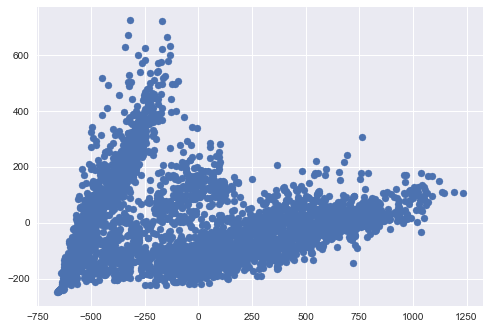

In [17]:
plt.scatter(X2[:,0],X2[:,1])

In [23]:
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

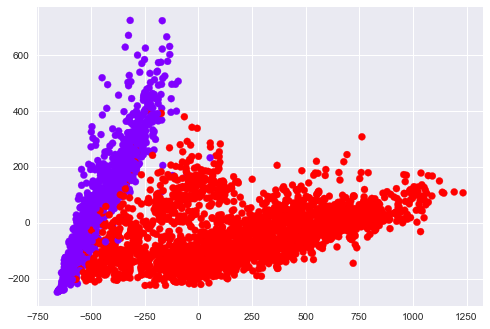

In [24]:
plt.scatter(X2[:,0],X2[:,1],c=labels,cmap="rainbow")

## Comparing with day of week

In [33]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

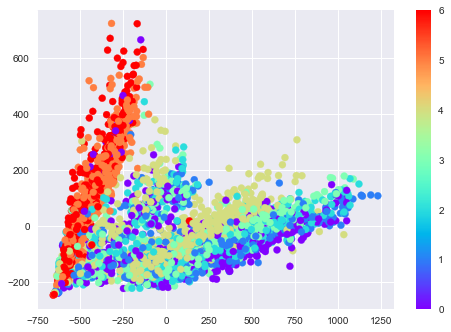

In [35]:
plt.scatter(X2[:,0],X2[:,1],c=dayofweek,cmap='rainbow')
plt.colorbar()

## Comparing weekdays and weekends

<AxesSubplot:xlabel='time'>

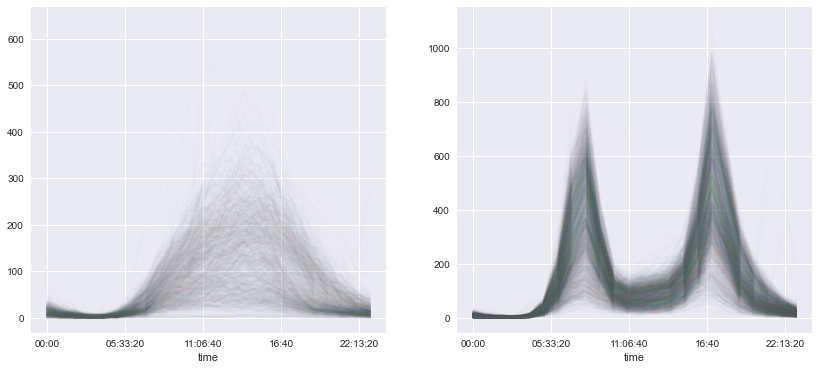

In [37]:
fig, ax = plt.subplots(1,2 ,figsize=(14,6))

pivoted.T[labels==0].T.plot(legend=False, alpha = 0.01,ax=ax[0])
pivoted.T[labels==1].T.plot(legend=False, alpha = 0.01,ax=ax[1])